## Linear Regression

## Real Estate Analysis

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data = pd.read_excel("Linear Regression.xlsx")

In [147]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [10]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


### Model 1 : Price vs Sqft_Living

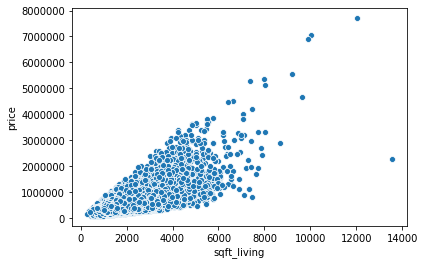

In [72]:
sns.scatterplot(data["sqft_living"],data["price"])

In [73]:
x1 = data.iloc[:,1:2]
x1

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [74]:
y1 = data.iloc[:,:1]
y1

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [87]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.2,random_state = 2)

In [88]:
x1.shape

(21613, 1)

In [89]:
y1.shape

(21613, 1)

In [90]:
X1_train.shape

(17290, 1)

In [91]:
y1_train.shape

(17290, 1)

In [92]:
X1_test.shape

(4323, 1)

In [93]:
y1_test.shape

(4323, 1)

In [103]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
lin_reg1.coef_   

array([[280.67382569]])

In [108]:
lin_reg1.intercept_  

array([-42568.70358496])

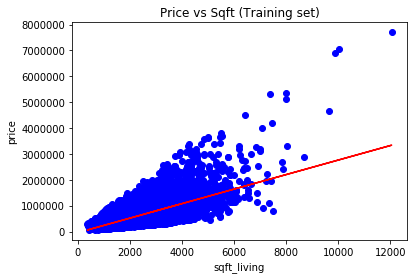

In [112]:
#Visualization of Training model
plt.scatter(X1_train, y1_train, color = 'blue')
plt.plot(X1_train, lin_reg1.predict(X1_train), color = 'red')
plt.title('Price vs Sqft (Training set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [126]:
X1_test.head()

,sqft_living
6638,2410
7366,2170
3158,1450
9117,4500
3392,860


In [127]:
y1_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [111]:
ypredict1 = lin_reg1.predict(X1_test)
ypredict1

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

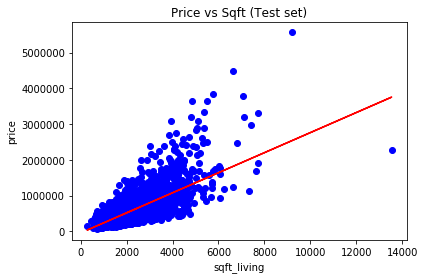

In [114]:
#Visualization of Test model
plt.scatter(X1_test, y1_test, color = 'blue')
plt.plot(X1_test, lin_reg1.predict(X1_test), color = 'red')
plt.title('Price vs Sqft (Test set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [124]:
#Peformance metrics or Cost function values
RMSE1 = np.sqrt(mean_squared_error(y1_test,ypredict1))
r2_1 = r2_score(y1_test,ypredict1)

In [125]:
print(f'RMSE is {RMSE1}')
print(f'r2 score is {r2_1}')

RMSE is 263380.00189817196
r2 score is 0.5031163723285275


In [133]:
unseen_pred=lin_reg1.predict(np.array([[2410]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[633855.21632509]]


___Inference for Price vs Sqft___ 

1. The corrleation coefficient b/w Price & sqft is 0.7 which means "Good Correlation"
2. R2 score is 0.50 which means 50.31% of variation in house price is explained by the variation in the square feet.
3. Regression eqn for House price = [-42568.70358496+280.67382569(sqft)]

### Model 2 : Price vs Bedroom

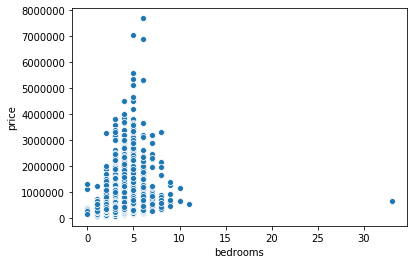

In [154]:
sns.scatterplot(data["bedrooms"],data["price"])

In [135]:
x2 = data.iloc[:,2:3]
x2

,bedrooms
0,3
1,3
2,2
3,4
4,3
...,...
21608,3
21609,4
21610,2
21611,3


In [136]:
y2 = data.iloc[:,:1]
y2

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [137]:
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 2)

In [140]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lin_reg2.coef_

array([[118660.62797869]])

In [142]:
lin_reg2.intercept_

array([139952.87593386])

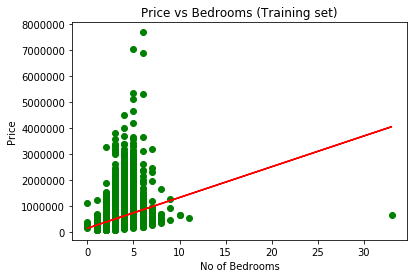

In [145]:
#visualization of Train dataset
plt.scatter(X2_train,y2_train, color="green")
plt.plot(X2_train,lin_reg2.predict(X2_train), color = "red")
plt.title('Price vs Bedrooms (Training set)')
plt.xlabel('No of Bedrooms')
plt.ylabel('Price')
plt.show()

In [148]:
ypredict2 = lin_reg2.predict(X2_test)
ypredict2

array([[614595.3878486 ],
       [495934.75986992],
       [377274.13189123],
       ...,
       [614595.3878486 ],
       [377274.13189123],
       [614595.3878486 ]])

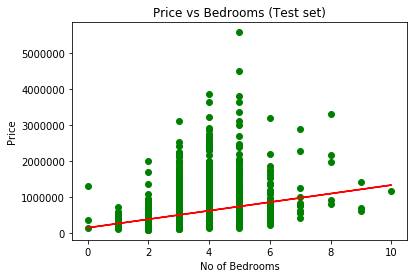

In [149]:
#visualization of Train dataset
plt.scatter(X2_test,y2_test, color="green")
plt.plot(X2_test,lin_reg2.predict(X2_test), color = "red")
plt.title('Price vs Bedrooms (Test set)')
plt.xlabel('No of Bedrooms')
plt.ylabel('Price')
plt.show()

In [150]:
#Peformance metrics or Cost function values
RMSE2 = np.sqrt(mean_squared_error(y2_test,ypredict2))
r2_2 = r2_score(y2_test,ypredict2)

In [151]:
print(f'RMSE is {RMSE2}')
print(f'r2 score is {r2_2}')

RMSE is 352717.9654187645
r2 score is 0.10886345250291585


In [153]:
unseen_pred=lin_reg2.predict(np.array([[3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[495934.75986992]]


___Inferrence for Price vs No of Bedrooms___ 

1. The corrleation coefficient b/w Price & sqft is 0.30 which means "Modreate Correlation"
2. R2 score is 0.10 which means 10% of variation in house price is explained by the variation in the no of bedrooms.
3. Regression eqn for House price = [139952.87593386+118660.62797869(bedrooms)]

### Model 3 : Price vs Bathrooms

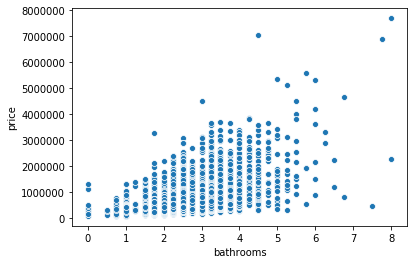

In [155]:
sns.scatterplot(data["bathrooms"],data["price"])

In [158]:
x3 = data.iloc[:,3:4]
x3

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
...,...
21608,2.50
21609,2.50
21610,0.75
21611,2.50


In [159]:
y3 = data.iloc[:,:1]
y3

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [160]:
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.2,random_state=2)

In [161]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
lin_reg3.coef_

array([[249143.95803858]])

In [164]:
lin_reg3.intercept_

array([13073.99575289])

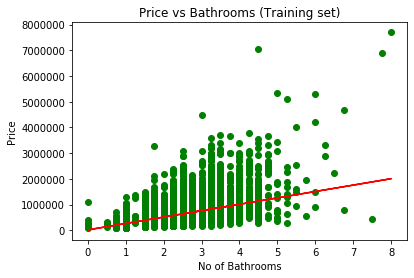

In [165]:
#visualization of Train dataset
plt.scatter(X3_train,y3_train, color="green")
plt.plot(X3_train,lin_reg3.predict(X3_train), color = "red")
plt.title('Price vs Bathrooms (Training set)')
plt.xlabel('No of Bathrooms')
plt.ylabel('Price')
plt.show()

In [166]:
ypredict3 = lin_reg3.predict(X3_test)
ypredict3

array([[573647.90133969],
       [386789.93281076],
       [262217.95379147],
       ...,
       [635933.89084934],
       [262217.95379147],
       [698219.88035898]])

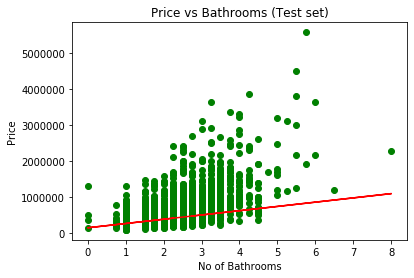

In [167]:
#visualization of Train dataset
plt.scatter(X3_test,y3_test, color="green")
plt.plot(X3_test,lin_reg2.predict(X3_test), color = "red")
plt.title('Price vs Bathrooms (Test set)')
plt.xlabel('No of Bathrooms')
plt.ylabel('Price')
plt.show()

In [168]:
#Peformance metrics or Cost function values
RMSE3 = np.sqrt(mean_squared_error(y3_test,ypredict3))
r2_3 = r2_score(y3_test,ypredict3)

In [169]:
print(f'RMSE is {RMSE3}')
print(f'r2 score is {r2_3}')

RMSE is 316774.90190998075
r2 score is 0.28122887124177365


In [186]:
unseen_pred=lin_reg3.predict(np.array([[2.5]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[635933.89084934]]


___Inference for Price vs No of Bathrooms___ 

1. The corrleation coefficient b/w Price & sqft is 0.52 which means "Moderate Correlation"
2. R2 score is 0.28 which means 28% of variation in house price is explained by the variation in the no of bathrooms.
3. Regression eqn for House price = [13073.99575289+249143.95803858(bathrooms)]

### Model 4 : Price vs Floors

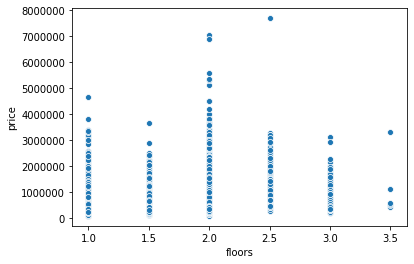

In [171]:
sns.scatterplot(data["floors"],data["price"])

In [172]:
x4 = data.iloc[:,4:5]
x4

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0
...,...
21608,3.0
21609,2.0
21610,2.0
21611,2.0


In [174]:
y4 = data.iloc[:,:1]
y4

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [175]:
X4_train,X4_test,y4_train,y4_test = train_test_split(x4,y4,train_size=0.2,random_state=2)

In [177]:
lin_reg4 = LinearRegression()
lin_reg4.fit(X4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
lin_reg4.coef_

array([[158995.97850329]])

In [179]:
lin_reg4.intercept_

array([301736.6149602])

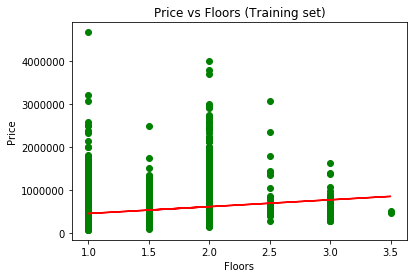

In [180]:
#visualization of Train dataset
plt.scatter(X4_train,y4_train, color="green")
plt.plot(X4_train,lin_reg4.predict(X4_train), color = "red")
plt.title('Price vs Floors (Training set)')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()

In [182]:
ypredict4 = lin_reg4.predict(X4_test)
ypredict4

array([[540230.58271514],
       [460732.59346349],
       [460732.59346349],
       ...,
       [460732.59346349],
       [619728.57196678],
       [460732.59346349]])

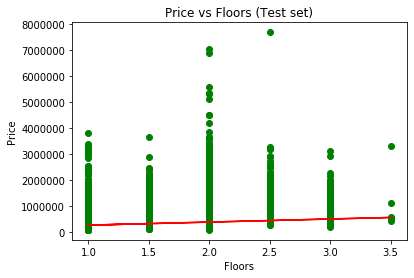

In [183]:
#visualization of Train dataset
plt.scatter(X4_test,y4_test, color="green")
plt.plot(X4_test,lin_reg2.predict(X4_test), color = "red")
plt.title('Price vs Floors (Test set)')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()

In [184]:
#performance metrics
RMSE4 = np.sqrt(mean_squared_error(y4_test,ypredict4))
r2_4 = r2_score(y4_test,ypredict4)

In [185]:
print(f'RMSE is {RMSE4}')
print(f'r2 score is {r2_4}')

RMSE is 356862.5152200447
r2 score is 0.06711878879481381


In [188]:
unseen_pred=lin_reg4.predict(np.array([[3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[778724.55047008]]


___Inference for Price vs No of floors___ 

1. The corrleation coefficient b/w Price & sqft is 0.25 which means "No Correlation"
2. R2 score is 0.06 which means 6% of variation in house price is explained by the variation in the floors.
3. Regression eqn for House price = [301736.6149602+158995.97850329(floors)]

### Model 5 : Price vs All features

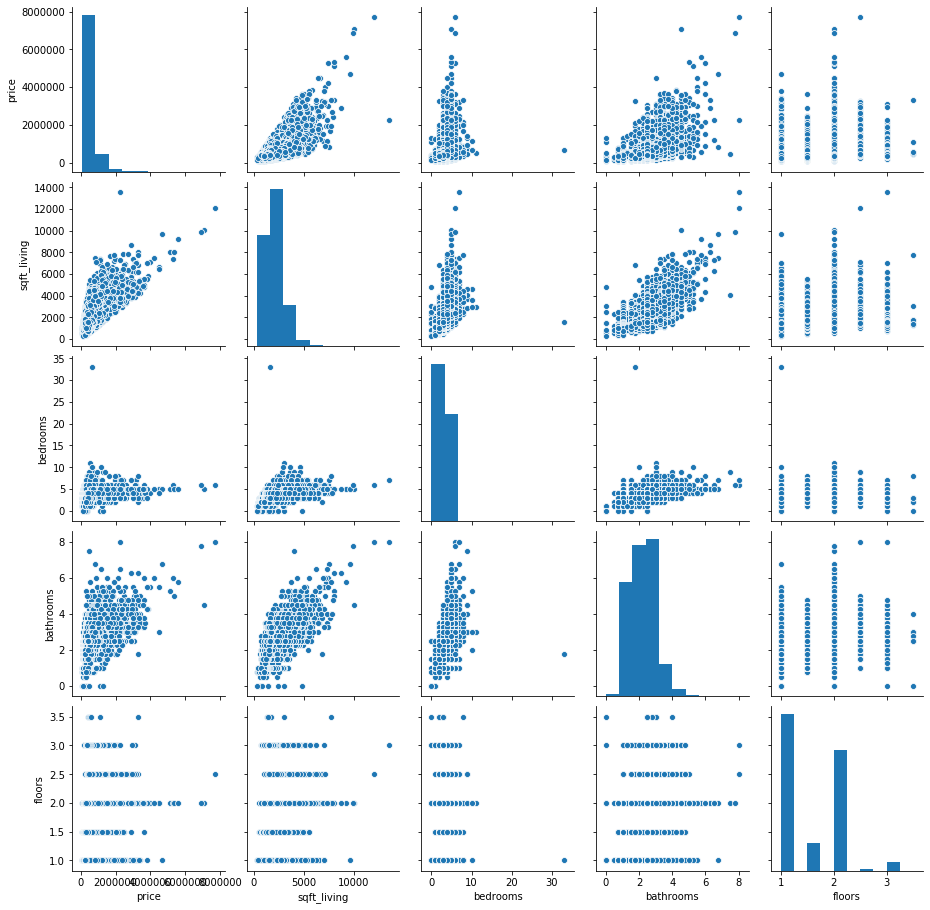

In [189]:
sns.pairplot(data)

In [191]:
x5 = data.iloc[:,1:5]
x5

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0
...,...,...,...,...
21608,1530,3,2.50,3.0
21609,2310,4,2.50,2.0
21610,1020,2,0.75,2.0
21611,1600,3,2.50,2.0


In [192]:
y5 = data.iloc[:,:1]
y5

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [193]:
X5_train,X5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.2,random_state=2)

In [195]:
lin_reg5 = LinearRegression()
lin_reg5.fit(X5_train,y5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
lin_reg5.coef_

array([[   309.11099034, -57550.54119311,   8440.49060067,
         -1165.39355228]])

In [197]:
lin_reg5.intercept_

array([76097.63298339])

In [199]:
ypredict5 = lin_reg5.predict(X5_test)
ypredict5

array([[608095.96846158],
       [585712.20079791],
       [416482.58364346],
       ...,
       [683810.03201802],
       [221742.65972713],
       [426849.61955589]])

In [200]:
#performance metrics
RMSE5 = np.sqrt(mean_squared_error(y5_test,ypredict5))
r2_5 = r2_score(y5_test,ypredict5)

In [201]:
print(f'RMSE is {RMSE5}')
print(f'r2 score is {r2_5}')

RMSE is 259763.19584802483
r2 score is 0.5166693554435362


In [203]:
unseen_pred=lin_reg5.predict(np.array([[24010,2.5,1.5,3]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[7363140.71338921]]


___Inference for Price vs All Features___ 

1. R2 score is 0.516 which means 51.6% of variation in house price is explained by the variation in the sqft,no of bedrooms, no of bathrooms & floors.
3. Regression eqn for House price = [76097.63298339+309.11099034(sqft)-57550.54119311(bedrooms)+8440.49060067(bathrooms)-1165.39355228(floors)]

# Logistic Regression

## Bank loan Modelling

In [204]:
data1 = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = 1)

In [205]:
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [207]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [208]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [217]:
data1 = data1.drop("ZIP Code",axis=1)

In [218]:
data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [312]:
y1 = data1["Personal Loan"]
y1

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [313]:
x1 = data1[["Age","Experience","Income","Family","CCAvg","Education","Mortgage",\
           "Securities Account","CD Account","Online","CreditCard"]]
x1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [230]:
import statsmodels.api as sm

In [232]:
X1 = sm.add_constant(x1)

In [314]:
log_reg1 = sm.Logit(y1,X1)

In [315]:
result1 = log_reg1.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [316]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        21:56:51   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

___Inferences___

1. As per the above table Features like "Income","Family","Education","Securities Account","CD Account","CCAvg","Online" & "CreditCard" are considered to be of high significance for approval or sanction of Personal loan as their p value is "0".

2. Howevere Features like "Age", "Experience" & "Mortgage" are also considered significant to some extend as their p value is less than "0.05".

## Attrition Analysis

In [289]:
data2 = pd.read_csv("general_data.csv")

In [290]:
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [291]:
data2 = data2.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours']) #dropping features
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [292]:
from sklearn.preprocessing import LabelEncoder #label encoder

In [293]:
def encode(cols):
    enc = LabelEncoder()
    for col in cols:
        data2[col] = enc.fit_transform(data2[col])

In [294]:
encode_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encode(encode_cols)

In [295]:
data2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [296]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [297]:
data2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [301]:
data2.dropna(how = 'any', inplace =True) #dropping NA values

In [302]:
data2.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [317]:
y2 = data2["Attrition"]
y2

0       0
1       1
2       0
3       0
4       0
       ..
4404    0
4405    0
4406    0
4407    0
4408    0
Name: Attrition, Length: 4382, dtype: int32

In [318]:
x2 = data2[["Age","BusinessTravel","Department","DistanceFromHome","Education","EducationField","Gender","JobLevel","JobRole",\
"MaritalStatus","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears",\
            "TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]]
x2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,2,2,4,3,4,0,2,1,2,35390,1.0,18,0,6.0,2,6,1,5
4405,42,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2


In [320]:
X2 = sm.add_constant(x2)

In [321]:
log_reg2 = sm.Logit(y2,X2)

In [322]:
result2 = log_reg2.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [323]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        21:58:18   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

___Inferences___

1. As per the above table Features like "Age","Department","EducationField","Marital Status","NumCompaniesWorked","TotalWorkingYears","TrainingTimesLastYear","YearsWithCurrManagee" & "YearsSinceLastPromotion" are considered to be of high significance for Attrition as their p value is "0".

2. Howevere Features like "BusinessTravel", "DistanceFromHome","Gender","JobLevel","JobRole","MonthlyIncome","PercentSalaryHike","StockOptionLevel","YearsAtCompany" & "Education" are also considered significant to some extend.